# Análisis de Municipios en España para Determinar el Mejor Lugar para Vivir

## Introducción

El objetivo de este análisis es determinar cuáles son los mejores municipios en España para vivir, teniendo en cuenta varios factores clave:

1. **Renta Neta Media por Municipio**: Evaluar la capacidad económica de los residentes.
2. **Gastos en Comida**: Estimar el coste de vida en términos de alimentación.
3. **Precio de Alquiler**: Analizar el coste del alquiler de viviendas.
4. **Número de Empresas por Municipio**: Considerar las oportunidades laborales disponibles.

## Análisis y Resultados

Una vez que los datos estén limpios, se procederá con el análisis para identificar los municipios que ofrecen las mejores condiciones para vivir según los criterios mencionados. Se calcularán indicadores clave y se compararán los municipios para tomar una decisión informada.

## Conclusión

El análisis proporcionará una visión clara de cuáles son los mejores municipios en España para vivir, teniendo en cuenta la renta neta, el coste de vida y las oportunidades laborales.

---

**Nota**: Este notebook está diseñado para ser ejecutado en un entorno local o en una plataforma de notebooks como Jupyter. Asegúrate de ajustar las rutas de los archivos según sea necesario.


## Preprocesamiento de Datos - Archivo "precio alquiler compartido"

Dado que los datos pueden contener valores faltantes (NaN), el primer paso será preprocesar los datos para asegurar su calidad. En este notebook, se realizarán las siguientes tareas de preprocesamiento:

1. **Lectura de Datos**: Cargar los archivos CSV que contienen la información necesaria.
2. **Relleno de Valores Faltantes**: Para los datos faltantes en la columna de precio de alquiler compartido, se calculará la media de los valores disponibles para el mismo municipio y se rellenarán los valores faltantes con esta media.
3. **Guardado de Datos Limpios**: Guardar los datos preprocesados en nuevos archivos CSV para su uso posterior. (Se mantiene el original para comprobar el correcto funcionamiento y tenerlo como backup para saber si se ha cometido alguna errata en el preprocesado)

In [2]:
import pandas as pd

# Leer el archivo CSV
file_path = 'precio alquiler compartido.csv'
data = pd.read_csv(file_path, delimiter=';')

# Mostrar las primeras filas del DataFrame para verificar la carga de datos
print(data.head())

# Calcular la media de los valores disponibles para cada municipio (NPRO)
mean_values = data.groupby('NPRO')['ALQTBID12_M_VC_11'].transform('mean')

# Rellenar los valores faltantes con la media calculada
data['ALQTBID12_M_VC_11'].fillna(mean_values, inplace=True)

# Mostrar las primeras filas del DataFrame después de rellenar los valores faltantes
print(data.head())

# Guardar el DataFrame modificado en un nuevo archivo CSV
output_file_path = 'Preprocesados/precio_alquiler_compartido_preprocesado.csv'
data.to_csv(output_file_path, index=False, sep=';')

print("Proceso completado. El archivo limpio ha sido guardado en:", output_file_path)


       NPRO  CUMUN       NMUN  ALQTBID12_M_VC_11
0  Albacete   2001  Abengibre                NaN
1  Albacete   2002     Alatoz                NaN
2  Albacete   2003   Albacete              450.0
3  Albacete   2004   Albatana                NaN
4  Albacete   2005    Alborea                NaN
       NPRO  CUMUN       NMUN  ALQTBID12_M_VC_11
0  Albacete   2001  Abengibre         282.571429
1  Albacete   2002     Alatoz         282.571429
2  Albacete   2003   Albacete         450.000000
3  Albacete   2004   Albatana         282.571429
4  Albacete   2005    Alborea         282.571429
Proceso completado. El archivo limpio ha sido guardado en: Preprocesados/precio_alquiler_compartido_preprocesado.csv


## Preprocesamiento de Datos - Archivo "empresas por municipio"

Dado que los datos pueden contener valores faltantes (en este caso vienen rellenados con "."), el primer paso será preprocesar los datos para asegurar su calidad. En este notebook, se realizarán las siguientes tareas de preprocesamiento:

1. **Lectura de Datos**: Cargar los archivos CSV que contienen la información necesaria.
2. **Relleno de Valores Faltantes**: Para los datos faltantes en la columna "Total" correspondiente al Nº total de empresas por municipio, 1º se sustitullen los valores nulos, en este caso dados en "." por NaN para manejar mejor (que no quiere decir que sean 0 sino que no se dispone del valor). 2º Se han rellenado los valores faltantes con interpolacion lineal para los casos en los que existia un historico. 3º Se ha realizado un "bfill" y un "ffill" porque en algunos casos la interpolación dejaba los datos de las esquinas (primer y ultimo dato) vacios. 4º Se ha realizado un redondeo porque no existen medias empresas. 
3. **Guardado de Datos Limpios**: Guardar los datos preprocesados en nuevos archivos CSV para su uso posterior. (Se mantiene el original para comprobar el correcto funcionamiento y tenerlo como backup para saber si se ha cometido alguna errata en el preprocesado)

In [ ]:
import pandas as pd
import numpy as np

# Leer el archivo CSV
file_path = 'empresas por municipio.csv'
data = pd.read_csv(file_path, delimiter=';')

# Mostrar las primeras filas del DataFrame para verificar la carga de datos
print(data.head())

# Reemplazar los valores "." por NaN para facilitar el procesamiento
data.replace('.', np.nan, inplace=True)

# Convertir la columna 'Total' a tipo numérico
data['Total'] = pd.to_numeric(data['Total'], errors='coerce')

# Separar el código y el nombre del municipio usando espacio como separador
data['Nombre_Municipio'] = data['Municipios'].str.split(' ', n=1, expand=True)[1]

# Función para rellenar valores faltantes utilizando interpolación lineal y redondeo
def fill_missing_values(group):
    # Interpolación lineal para rellenar valores faltantes
    group['Total'] = group['Total'].interpolate(method='linear', limit_direction='both')
    # Rellenar valores faltantes al principio y al final con el valor más cercano disponible
    group['Total'] = group['Total'].fillna(method='bfill').fillna(method='ffill')
    # Redondear los valores interpolados y convertir a entero
    group['Total'] = group['Total'].round()
    return group

# Aplicar la función a cada grupo de municipios
data = data.groupby('Municipios').apply(fill_missing_values)

# Mostrar las primeras filas del DataFrame después de rellenar los valores faltantes
print(data.head())

# Guardar el DataFrame modificado en un nuevo archivo CSV
output_file_path = 'Preprocesados/empresas_por_municipio_limpio.csv'
data.to_csv(output_file_path, index=False, sep=';')

print("Proceso completado. El archivo limpio ha sido guardado en:", output_file_path)


               Municipios  Periodo Total
0  01001 Alegría-Dulantzi     2024   148
1  01001 Alegría-Dulantzi     2023   150
2  01001 Alegría-Dulantzi     2022   154
3  01001 Alegría-Dulantzi     2021   169
4  01001 Alegría-Dulantzi     2020   155
                                      Municipios  Periodo  Total  \
Municipios                                                         
01001 Alegría-Dulantzi 0  01001 Alegría-Dulantzi     2024  148.0   
                       1  01001 Alegría-Dulantzi     2023  150.0   
                       2  01001 Alegría-Dulantzi     2022  154.0   
                       3  01001 Alegría-Dulantzi     2021  169.0   
                       4  01001 Alegría-Dulantzi     2020  155.0   

                          Nombre_Municipio  
Municipios                                  
01001 Alegría-Dulantzi 0  Alegría-Dulantzi  
                       1  Alegría-Dulantzi  
                       2  Alegría-Dulantzi  
                       3  Alegría-Dulantzi  
       

## Preprocesamiento de Datos - Archivo "renta neta municipios"

Dado que los datos pueden contener valores faltantes (en este caso vienen rellenados con "."), el primer paso será preprocesar los datos para asegurar su calidad. En este notebook, se realizarán las siguientes tareas de preprocesamiento:

1. **Lectura de Datos**: Cargar los archivos CSV que contienen la información necesaria.
2. **Relleno de Valores Faltantes**: Para los datos faltantes en la columna "Total" correspondiente a la renta per cápita por municipio, 1º se sustitullen los valores nulos, en este caso dados en "." por NaN para manejar mejor (que no quiere decir que sean 0 sino que no se dispone del valor). 2º Se han rellenado los valores faltantes con interpolacion lineal para los casos en los que existia un historico. 3º Se ha realizado un "bfill" y un "ffill" porque en algunos casos la interpolación dejaba los datos de las esquinas (primer y ultimo dato) vacios. 4º Se ha realizado un redondeo a dos decimales porque por debajo de los centimos no existe valor. 
3. **Guardado de Datos Limpios**: Guardar los datos preprocesados en nuevos archivos CSV para su uso posterior. (Se mantiene el original para comprobar el correcto funcionamiento y tenerlo como backup para saber si se ha cometido alguna errata en el preprocesado)

In [8]:
import pandas as pd
import numpy as np

# Leer el archivo CSV
file_path = 'renta neta municipios.csv'
data = pd.read_csv(file_path, delimiter=';')

# Mostrar las primeras filas del DataFrame para verificar la carga de datos
print(data.head())

# Reemplazar los valores "." por NaN para facilitar el procesamiento
data.replace('.', np.nan, inplace=True)

# Función para convertir valores en formato español a numérico
def convert_to_numeric(value):
    if pd.isna(value):
        return np.nan
    return float(value.replace('.', '').replace(',', '.'))

# Aplicar la función a la columna 'Total'
data['Total'] = data['Total'].apply(convert_to_numeric)

# Separar el código y el nombre del municipio usando espacio como separador
data['Nombre_Municipio'] = data['Municipios'].str.split(' ', n=1, expand=True)[1]

# Función para rellenar valores faltantes utilizando interpolación lineal
def fill_missing_values(group):
    # Interpolación lineal para rellenar valores faltantes
    group['Total'] = group['Total'].interpolate(method='linear', limit_direction='both')
    # Rellenar valores faltantes al principio y al final con el valor más cercano disponible
    group['Total'] = group['Total'].fillna(method='bfill').fillna(method='ffill')
    # Redondear los valores interpolados
    group['Total'] = group['Total'].round(2)
    return group

# Aplicar la función a cada grupo de municipios
data = data.groupby('Municipios').apply(fill_missing_values)

# Mostrar las primeras filas del DataFrame después de rellenar los valores faltantes
print(data.head())

# Guardar el DataFrame modificado en un nuevo archivo CSV
output_file_path = 'Preprocesados/renta_neta_municipios_limpio.csv'
data.to_csv(output_file_path, index=False, sep=';')

print("Proceso completado. El archivo limpio ha sido guardado en:", output_file_path)


        Municipios  Periodo     Total
0  02001 Abengibre     2022  13.063,0
1  02001 Abengibre     2021  12.188,0
2  02001 Abengibre     2020  11.675,0
3  02001 Abengibre     2019  11.132,0
4  02001 Abengibre     2018  10.854,0
                                         Municipios  Periodo    Total  \
Municipios                                                              
01001 Alegría-Dulantzi 2656  01001 Alegría-Dulantzi     2022  15116.0   
                       2657  01001 Alegría-Dulantzi     2021  14647.0   
                       2658  01001 Alegría-Dulantzi     2020  13969.0   
                       2659  01001 Alegría-Dulantzi     2019  14299.0   
                       2660  01001 Alegría-Dulantzi     2018  13361.0   

                             Nombre_Municipio  
Municipios                                     
01001 Alegría-Dulantzi 2656  Alegría-Dulantzi  
                       2657  Alegría-Dulantzi  
                       2658  Alegría-Dulantzi  
                    

Top 20 municipios con mas renta per cápita

In [ ]:
import pandas as pd

# Leer el archivo limpio de renta neta por municipios
file_path = 'Preprocesados/renta_neta_municipios_limpio.csv'
renta_df = pd.read_csv(file_path, delimiter=';')

# Asegurarse que la columna 'Total' es numérica
renta_df['Total'] = pd.to_numeric(renta_df['Total'], errors='coerce')

# Obtener el último año disponible
ultimo_ano = renta_df['Periodo'].max()

# Filtrar datos del último año y obtener el top 20 municipios con mayor renta
renta_ultimo_ano = renta_df[renta_df['Periodo'] == ultimo_ano]
top10_municipios = renta_ultimo_ano.nlargest(20, 'Total')[['Nombre_Municipio', 'Total']]

# Mostrar el top 20
print("Top 20 municipios con mayor renta neta:")
print(top10_municipios)

# Guardar los nombres de los top 20 municipios en una lista para usar más adelante
top10_nombres = top10_municipios['Nombre_Municipio'].tolist()


Top 20 municipios con mayor renta neta:
               Nombre_Municipio    Total
35136        Pozuelo de Alarcón  29258.0
38464  Oroz-Betelu/Orotz-Betelu  25780.0
37816                      Goñi  25532.0
7864                 Matadepera  24814.0
19864                    Bolvir  24812.0
34432        Boadilla del Monte  24748.0
20568    Palau de Santa Eulàlia  24437.0
20416                Madremanya  24190.0
32160                   Vilamòs  24052.0
7112                  Brull, El  23957.0
8656          Sant Just Desvern  23701.0
37928                Izagaondoa  23660.0
38312                 Muruzábal  23622.0
8528      Sant Cugat del Vallès  23337.0
37112                  Arellano  23315.0
38000               Lapoblación  23260.0
37320             Biurrun-Olcoz  23231.0
38904   Villamayor de Monjardín  23177.0
35416              Torrelodones  23173.0
20208               Fontanilles  23097.0


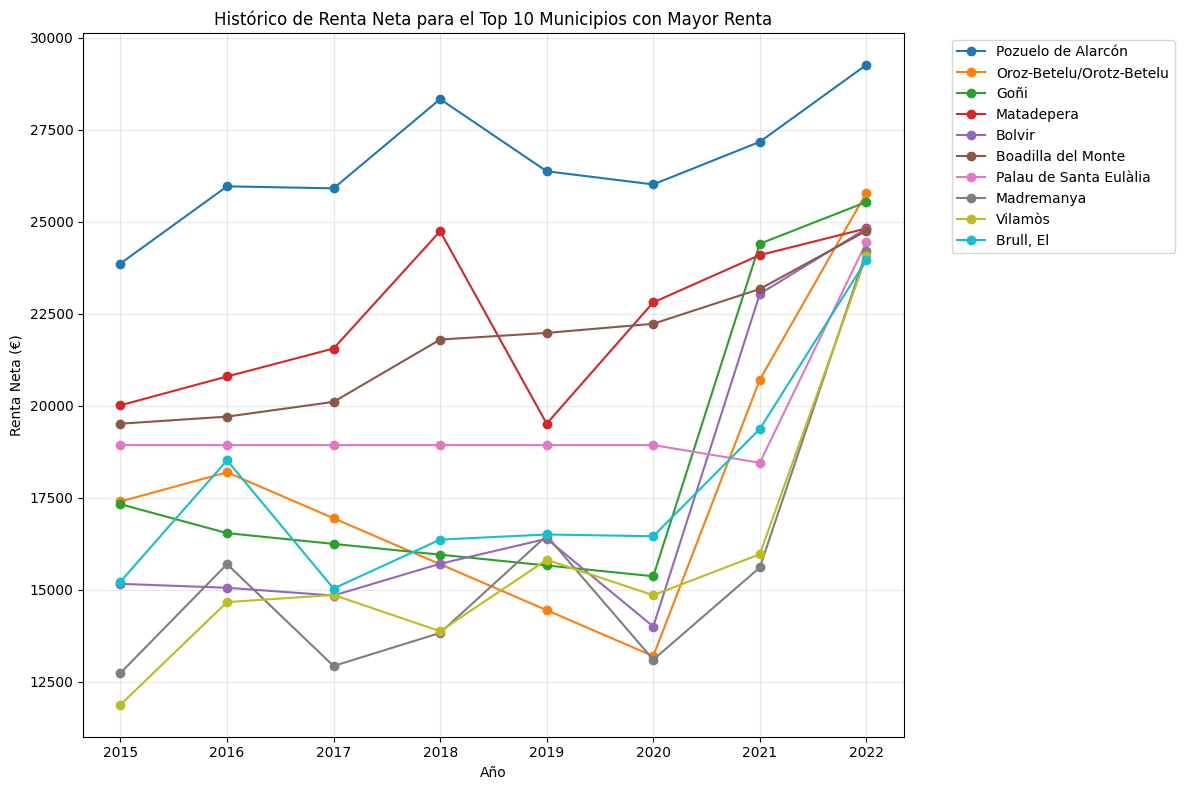

In [12]:
import matplotlib.pyplot as plt

# Tomamos solo los primeros 10 municipios (ya tienes los 20)
top10_nombres = top10_nombres[:10]

# Filtrar el histórico para los municipios del top 10
historico_top10 = renta_df[renta_df['Nombre_Municipio'].isin(top10_nombres)]

# Crear gráfico histórico para el top 10
plt.figure(figsize=(12, 8))

for municipio in top10_nombres:
    datos_municipio = historico_top10[historico_top10['Nombre_Municipio'] == municipio].sort_values('Periodo')
    plt.plot(datos_municipio['Periodo'], datos_municipio['Total'], marker='o', label=municipio)

plt.title('Histórico de Renta Neta para el Top 10 Municipios con Mayor Renta')
plt.xlabel('Año')
plt.ylabel('Renta Neta (€)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Vamos a ver si existe alguna relación entre la renta y el numero de empresas

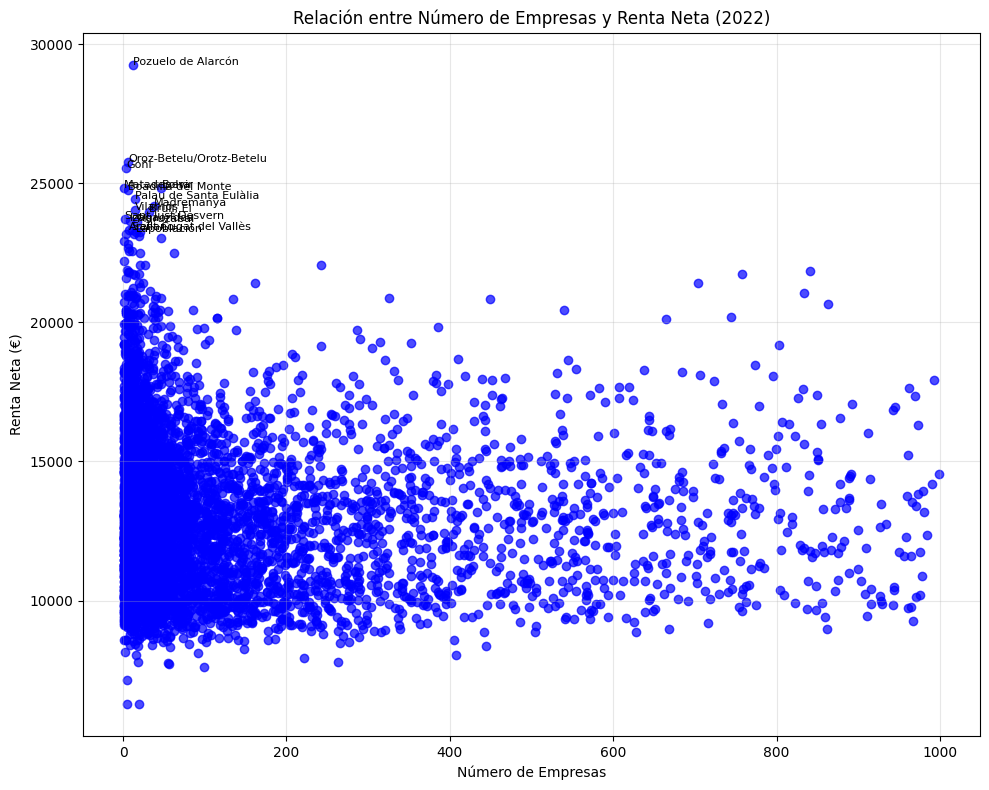

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Cargar los datos limpios
empresas_file = 'Preprocesados/empresas_por_municipio_limpio.csv'
renta_file = 'Preprocesados/renta_neta_municipios_limpio.csv'

empresas_df = pd.read_csv(empresas_file, delimiter=';')
renta_df = pd.read_csv(renta_file, delimiter=';')

# Asegurar que las columnas son numéricas
empresas_df['Total'] = pd.to_numeric(empresas_df['Total'], errors='coerce')
renta_df['Total'] = pd.to_numeric(renta_df['Total'], errors='coerce')
empresas_df['Periodo'] = pd.to_numeric(empresas_df['Periodo'], errors='coerce')
renta_df['Periodo'] = pd.to_numeric(renta_df['Periodo'], errors='coerce')

# Encontrar el último año disponible en ambos datasets
ultimo_ano_empresas = empresas_df['Periodo'].max()
ultimo_ano_renta = renta_df['Periodo'].max()
ultimo_ano = min(ultimo_ano_empresas, ultimo_ano_renta)

# Filtrar datos para el último año
empresas_ultimo_ano = empresas_df[empresas_df['Periodo'] == ultimo_ano]
renta_ultimo_ano = renta_df[renta_df['Periodo'] == ultimo_ano]

# Unir ambos DataFrames por Nombre_Municipio para el último año
merged_ultimo_ano = pd.merge(empresas_ultimo_ano, renta_ultimo_ano, 
                             on='Nombre_Municipio', 
                             suffixes=('_Empresas', '_Renta'))

# 1. VISUALIZACIÓN 2D - Relación entre empresas y renta para el último año
plt.figure(figsize=(10, 8))
plt.scatter(merged_ultimo_ano['Total_Empresas'], merged_ultimo_ano['Total_Renta'], 
           alpha=0.7, c='blue')

# Añadir etiquetas a algunos puntos destacados (opcional)
for i, txt in enumerate(merged_ultimo_ano['Nombre_Municipio']):
    # Solo etiquetar algunos municipios (por ejemplo, los 10 con mayor renta)
    if merged_ultimo_ano.iloc[i]['Total_Renta'] >= sorted(merged_ultimo_ano['Total_Renta'])[-10]:
        plt.annotate(txt, 
                    (merged_ultimo_ano.iloc[i]['Total_Empresas'], 
                     merged_ultimo_ano.iloc[i]['Total_Renta']),
                    fontsize=8)

plt.title(f'Relación entre Número de Empresas y Renta Neta ({ultimo_ano})')
plt.xlabel('Número de Empresas')
plt.ylabel('Renta Neta (€)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. VISUALIZACIÓN 3D - Relación histórica entre empresas, renta y tiempo
# Unir los datos históricos por municipio y año
merged_historico = pd.merge(empresas_df, renta_df, 
                           on=['Nombre_Municipio', 'Periodo'], 
                           suffixes=('_Empresas', '_Renta'))



Miramos que municipios son más interesantes: sueldo neto - precio alquiler

In [48]:
import pandas as pd

# Cargar datos limpios
empresas = pd.read_csv('Preprocesados/empresas_por_municipio_limpio.csv', sep=';')
renta = pd.read_csv('Preprocesados/renta_neta_municipios_limpio.csv', sep=';')
alquiler = pd.read_csv('Preprocesados/precio_alquiler_compartido_preprocesado.csv', sep=';')
CA_prov = pd.read_csv('CA-Provincia.csv', sep=";")

# Función para obtener último año de cada municipio
def filtrar_ultimo_año(df):
    # Convertir Periodo a numérico
    df['Periodo'] = pd.to_numeric(df['Periodo'], errors='coerce')
    # Obtener índice del último año por municipio
    idx = df.groupby('Nombre_Municipio')['Periodo'].idxmax()
    return df.loc[idx].reset_index(drop=True)

# Aplicar a ambos datasets
empresas_last = filtrar_ultimo_año(empresas)
renta_last = filtrar_ultimo_año(renta)

# Unir renta y empresas
merged = pd.merge(
    renta_last[['Nombre_Municipio', 'Total']],
    empresas_last[['Nombre_Municipio', 'Total']],
    on='Nombre_Municipio',
    suffixes=('_Renta', '_Empresas')
)

# Unir con alquiler (usamos NMUN como nombre de municipio)
final_df = pd.merge(
    merged,
    alquiler[['NMUN', 'NPRO', 'ALQTBID12_M_VC_11']],
    left_on='Nombre_Municipio',
    right_on='NMUN',
    how='inner'
).drop_duplicates('Nombre_Municipio')

# Calcular diferencia renta-alquiler (anual)
final_df['Diferencia'] = final_df['Total_Renta'] - (final_df['ALQTBID12_M_VC_11'] * 12)

# Unir con tabla relacional CA-NPRO
final_df = pd.merge(
    final_df,
    CA_prov[['Comunidad Autonoma', 'Provincia']],
    left_on='NPRO',
    right_on='Provincia',
    how='inner'
)

#Dimensiones
dimension = pd.read_csv('Dimension.csv', sep=";")

# Unir con tabla dimensiones
final_df = pd.merge(
    final_df,
    dimension[['Comunidad Autonoma','Condiciones Materiales','Trabajo','Salud','Educacion','Seguridad','Ocio y relaciones']],
    left_on='Comunidad Autonoma',
    right_on='Comunidad Autonoma',
    how='inner'
)

# Seleccionar y ordenar columnas
final_df = final_df[['Nombre_Municipio', 'NPRO','Comunidad Autonoma', 'Total_Empresas', 'Diferencia', 'Condiciones Materiales','Trabajo','Salud','Educacion','Seguridad','Ocio y relaciones']]

print(final_df.head())


       Nombre_Municipio    NPRO Comunidad Autonoma  Total_Empresas  \
0                Ababuj  Teruel             Aragón             4.0   
1              Abejuela  Teruel             Aragón             NaN   
2               Aguatón  Teruel             Aragón             NaN   
3              Aguaviva  Teruel             Aragón            31.0   
4  Aguilar del Alfambra  Teruel             Aragón             4.0   

   Diferencia Condiciones Materiales Trabajo   Salud Educacion Seguridad  \
0      8677.0                  103,1  103,87  102,48    111,73    105,03   
1     10357.0                  103,1  103,87  102,48    111,73    105,03   
2     11967.0                  103,1  103,87  102,48    111,73    105,03   
3      8568.0                  103,1  103,87  102,48    111,73    105,03   
4      8677.0                  103,1  103,87  102,48    111,73    105,03   

  Ocio y relaciones  
0            100,59  
1            100,59  
2            100,59  
3            100,59  
4           

In [56]:
# Columnas a normalizar
cols_to_normalize = [
    'Total_Empresas', 'Diferencia', 'Condiciones Materiales',
    'Trabajo', 'Salud', 'Educacion', 'Seguridad', 'Ocio y relaciones'
]

# Convertir columnas con coma decimal a float
for col in cols_to_normalize:
    if final_df[col].dtype == object:
        final_df[col] = final_df[col].str.replace(',', '.').astype(float)

# Crear nuevo DataFrame con nombres y valores normalizados
normalized_cols = [col + '_norm' for col in cols_to_normalize]
final_df_normalized = final_df[['Nombre_Municipio']].copy()
final_df_normalized[normalized_cols] = (
    final_df[cols_to_normalize] - final_df[cols_to_normalize].min()
) / (final_df[cols_to_normalize].max() - final_df[cols_to_normalize].min())

print(final_df_normalized.head())


       Nombre_Municipio  Total_Empresas_norm  Diferencia_norm  \
0                Ababuj             0.003012         0.386269   
1              Abejuela                  NaN         0.478134   
2               Aguatón                  NaN         0.566171   
3              Aguaviva             0.030120         0.380309   
4  Aguilar del Alfambra             0.003012         0.386269   

   Condiciones Materiales_norm  Trabajo_norm  Salud_norm  Educacion_norm  \
0                      0.98829      0.873449    0.604069        0.630267   
1                      0.98829      0.873449    0.604069        0.630267   
2                      0.98829      0.873449    0.604069        0.630267   
3                      0.98829      0.873449    0.604069        0.630267   
4                      0.98829      0.873449    0.604069        0.630267   

   Seguridad_norm  Ocio y relaciones_norm  
0        0.840645                0.869816  
1        0.840645                0.869816  
2        0.840645   

In [68]:
# 1. Define los pesos para cada indicador (ajusta a tu gusto)
weights = {
    'Total_Empresas_norm': 0.05,
    'Diferencia_norm': 0.2,
    'Condiciones Materiales_norm': 0.2,
    'Trabajo_norm': 0.2,
    'Salud_norm': 0.15,
    'Educacion_norm': 0.05,
    'Seguridad_norm': 0.05,
    'Ocio y relaciones_norm': 0.1
}

# 2. Sustituye NaN por 0 solo en las columnas de indicadores
for col in weights.keys():
    final_df_normalized[col] = final_df_normalized[col].fillna(0)

# 3. Calcula el indicador maestro ponderado
final_df_normalized['Indicador_Maestro'] = sum(
    final_df_normalized[col] * peso for col, peso in weights.items()
)

# 4. Escala el indicador a 0-100
min_val = final_df_normalized['Indicador_Maestro'].min()
max_val = final_df_normalized['Indicador_Maestro'].max()
final_df_normalized['Indicador_Maestro'] = (
    (final_df_normalized['Indicador_Maestro'] - min_val) / (max_val - min_val)
) * 100

# 5. Ranking top 10 municipios
ranking_top10 = final_df_normalized.sort_values('Indicador_Maestro', ascending=False).head(20)
print(ranking_top10[['Nombre_Municipio', 'Indicador_Maestro']])

            Nombre_Municipio  Indicador_Maestro
362                    Nueno         100.000000
264                   Arguis          99.887977
274                 Banastás          98.950584
337                   Ibieca          98.261180
342                     Jasa          97.363135
338                   Igriés          97.337231
385                  Quicena          96.770054
314                Chimillas          96.383070
403                    Seira          96.183698
252                   Alerre          96.070047
309        Castiello de Jaca          96.027738
388                    Sahún          95.948415
339                    Ilche          95.184916
387               Sabiñánigo          94.982489
431                 Villanúa          94.913303
247         Alcalá de Gurrea          94.789356
353                Loporzano          94.403595
296              Caldearenas          94.371755
200  Torrecilla del Rebollar          94.341104
106       Hinojosa de Jarque          94

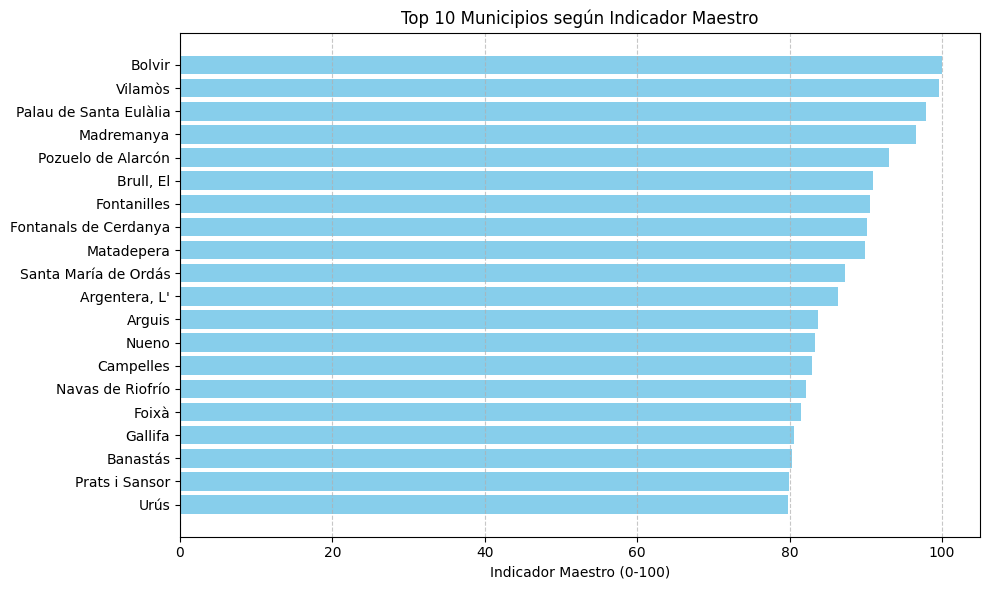

In [67]:
import matplotlib.pyplot as plt

# Ordenar de menor a mayor para el gráfico horizontal
ranking_top10_sorted = ranking_top10.sort_values('Indicador_Maestro', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(ranking_top10_sorted['Nombre_Municipio'], ranking_top10_sorted['Indicador_Maestro'], color='skyblue')
plt.xlabel('Indicador Maestro (0-100)')
plt.title('Top 10 Municipios según Indicador Maestro')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()